In [1]:
#Linear Regression

In [2]:
#importing libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data.

data=pd.read_csv(r"C:\Users\navin\Downloads\car_age_price (1).csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [9]:
data.nunique()

Year      8
Price    35
dtype: int64

In [10]:
data["Price"].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [11]:
#Finding Correlation

data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<AxesSubplot:>

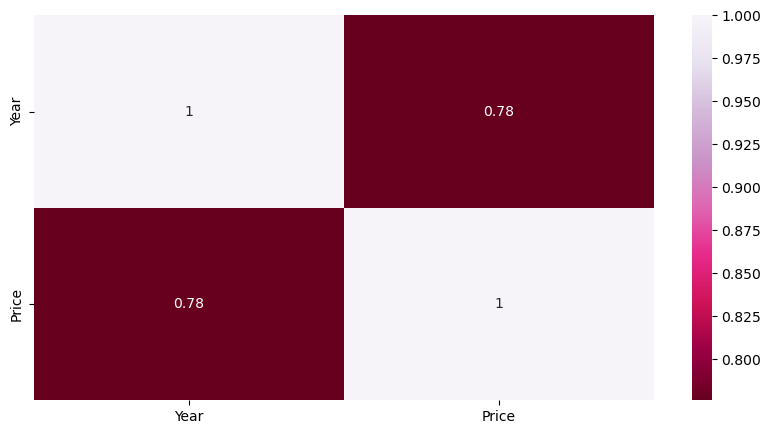

In [12]:
#Heatmap

corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap="PuRd_r")

<AxesSubplot:title={'center':'Relationship between Year and Price'}, xlabel='Year', ylabel='Price'>

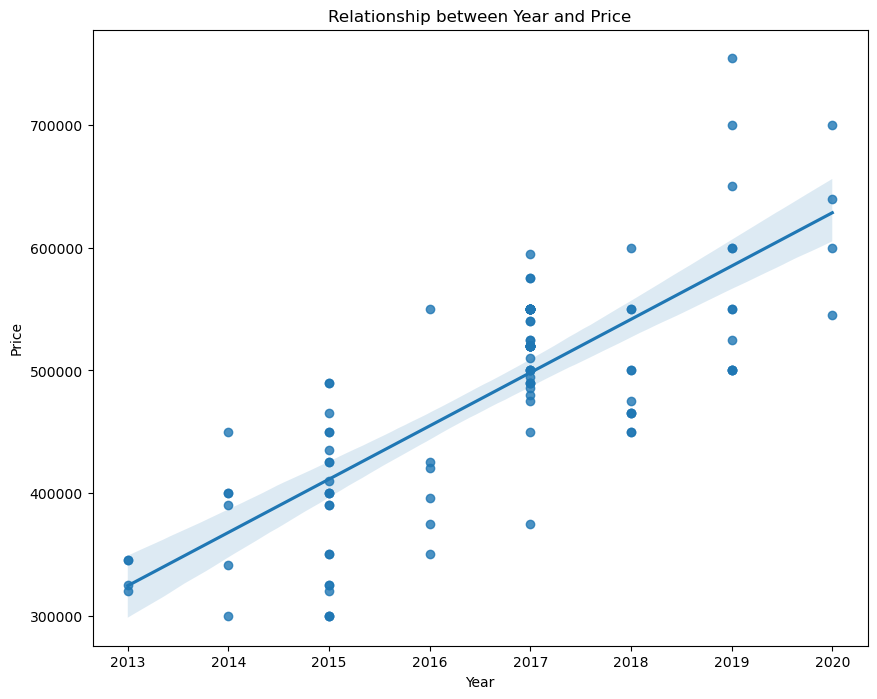

In [13]:
#plotting the relationship between year and price 

fig=plt.figure(figsize=(10,8))
plt.title('Relationship between Year and Price')
sns.regplot(x='Year', y='Price',data = data)

In [14]:
#Initializing x and y where x is the x is independent variable and y is dependent variable

y= data['Price']#target
x= data.drop(['Price'],axis=1)

In [15]:
#splitting the data for training and testing.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_test.shape

(34, 1)

In [17]:
x_train.shape

(78, 1)

In [18]:
y_test.shape

(34,)

In [19]:
y_train.shape

(78,)

In [20]:
#creating linear regression model

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
model= LinearRegression() 

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
pred=model.predict(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE is : ',mean_absolute_error(pred,y_test)) 
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  50966.62199524177
MSE is :  3962573261.894448
R2 is :  0.3764280057772862


In [25]:
#predicting the price for the year 2022

model.predict([[2022]])

C:\Users\navin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([738670.65829848])

In [26]:
#Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso (alpha=1.0)
model2 = lasso.fit(x_train,y_train)
model2

Lasso()

In [28]:
pred = lasso.predict(x_test)

In [29]:
#lasso.fit(x_train,y_train)
print('MAE is : ',mean_absolute_error(pred,y_test))
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  50966.34042989638
MSE is :  3962549680.6533012
R2 is :  0.3764209007824255


In [30]:
#predicting value for 2022
model2.predict([[2022]])


C:\Users\navin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([738668.46702529])

In [31]:
#conclution.
#Here r2 score can be taken 37% for both the models of linear regression and lasso.
#while considering the decimal values, lasso can be seen better than linear but still both have only 37% performance.

In [32]:
#checking the result for normalized data.

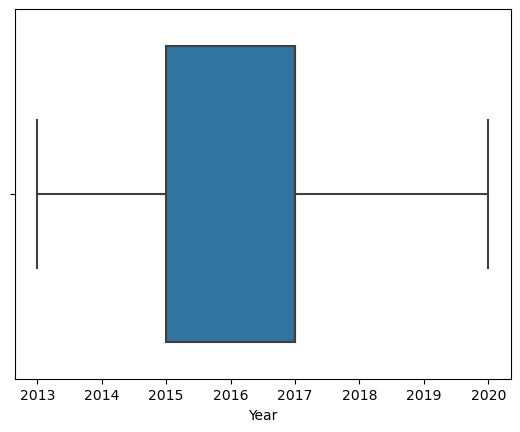

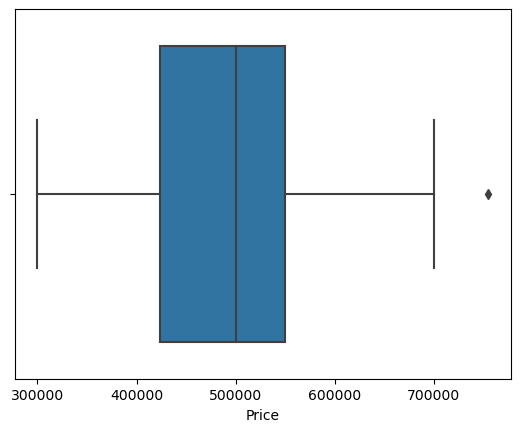

In [33]:
#Checking outliers
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [34]:
#Removing Outliers

from scipy import stats
IQR =stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [35]:
Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [36]:
data.loc[data.Price<min_limit]


,Year,Price


In [37]:
data.loc[data.Price>max_limit]


,Year,Price
1,2019,755000


In [38]:
data.loc[data['Price']>max_limit,'Price']=np.median(data.Price)

In [39]:
data.loc[data.Price>max_limit]

,Year,Price


In [40]:
#Normalization

In [41]:
from sklearn import preprocessing
df = preprocessing.normalize(data)
norm_df = pd.DataFrame(df, columns=data.columns)
norm_df

,Year,Price
0,0.004340,0.999991
1,0.004038,0.999992
2,0.002884,0.999996
3,0.004340,0.999991
4,0.004340,0.999991
...,...,...
107,0.005376,0.999986
108,0.006713,0.999977
109,0.004741,0.999989
110,0.004800,0.999988


C:\Users\navin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

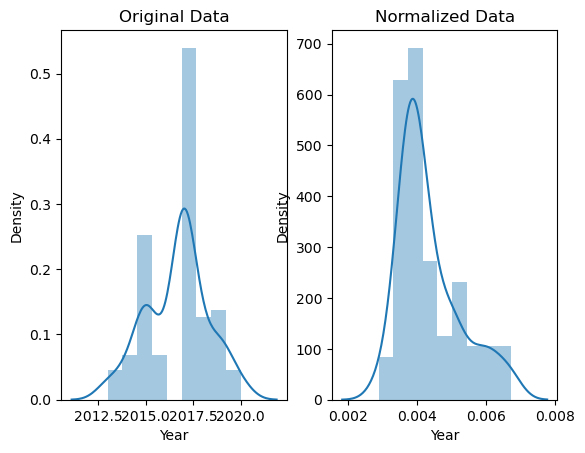

In [42]:
fig,ax=plt.subplots(1,2)
sns.distplot(data.Year,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(norm_df.Year,ax=ax[1])
ax[1].set_title("Normalized Data")

C:\Users\navin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

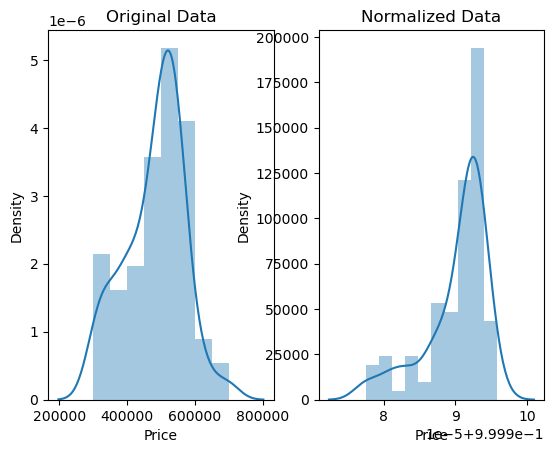

In [43]:
fig,ax=plt.subplots(1,2)
sns.distplot(data.Price,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(norm_df.Price,ax=ax[1])
ax[1].set_title("Normalized Data")

In [44]:
#Linear Regression for Normalized Data


In [57]:
y= data['Price']#target
x= norm_df.drop(['Price'],axis=1)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [61]:
model_norm= LinearRegression() 


In [62]:
model_norm.fit(x_train,y_train)


LinearRegression()

In [64]:
pred_norm_lr= model_norm.predict(x_test)


In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE is : ',mean_absolute_error(pred_norm_lr,y_test))
print('MSE is : ',mean_squared_error(pred_norm_lr,y_test))
print('R2 is : ',r2_score(pred_norm_lr,y_test))

MAE is :  13451.834229098016
MSE is :  336291618.0724891
R2 is :  0.9631881520192624


In [66]:
#Lasso Regression for Normalized Data


In [68]:
from sklearn.linear_model import Lasso
lasso = Lasso (alpha=1.0)
model1_norm = lasso.fit(x_train,y_train)
model1_norm

Lasso()

In [69]:
pred = lasso.predict(x_test)
#lasso.fit(x_train,y_train)
print('MAE is : ',mean_absolute_error(pred,y_test))
print('MSE is : ',mean_squared_error(pred,y_test))
print('R2 is : ',r2_score(pred,y_test))

MAE is :  13146.817051475451
MSE is :  302641064.4496341
R2 is :  0.9659766113468933


In [ ]:
#Conclution.

#r2 score implies that 96.3% performance for Linear Regression model and 96.5% for Lasso Regression model,
#which makes Lasso a better performance model.
